In [1]:
from nn import Layer, NN, Adam, RMSprop, SGD, AdaGrad
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets    # Solo lo usamos para obtener los datos
digits = datasets.load_digits()

Como primera verificación vemos que los targets estan correctamente asociados.

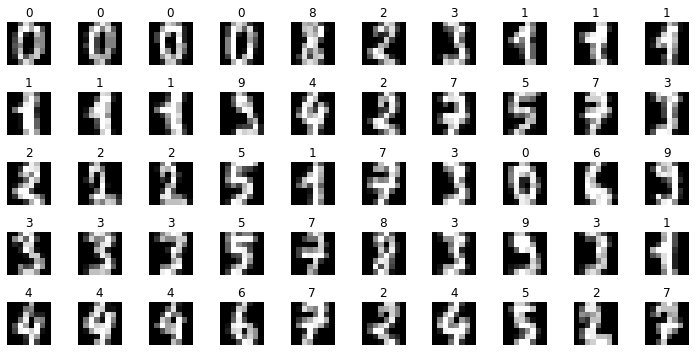

In [3]:
fig, ax = plt.subplots(5, 10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        ax[i, j].imshow(digits.data[10* j + i].reshape(8, 8), cmap="gray")
        ax[i, j].set_title(digits.target[10 * j + i])
        ax[i, j].axis("off")

plt.tight_layout()
plt.show()

Luego separamos en conjuntos de entrenamiento y validación para tener un punto común de comparación entre diferentes variantes estudiadas.

Como los targets tienen la forma $\{0, 1, 2, ..., 9\}$ los transformaremos en un vector de 10 filas donde cada fila corresponda a cada digito (one-hot encoding).

Tambien se modifica la entrada para que los numeros se encuentren en el rango $0..1$.

In [4]:
from sklearn.model_selection import train_test_split

target = np.zeros((digits.target.shape[0], 10))
for i, t in enumerate(digits.target):
    target[i, t] = 1

x_train, x_test, y_train, y_test = train_test_split(
    digits.data / 16.0, target, test_size=0.5, shuffle=False
)

print("Dato de entrada:")
print(x_train[0])
print()
print("Dato de salida:")
print(y_train[0])

Dato de entrada:
[0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.     0.     0.
 0.8125 0.9375 0.625  0.9375 0.3125 0.     0.     0.1875 0.9375 0.125
 0.     0.6875 0.5    0.     0.     0.25   0.75   0.     0.     0.5
 0.5    0.     0.     0.3125 0.5    0.     0.     0.5625 0.5    0.
 0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.     0.     0.125
 0.875  0.3125 0.625  0.75   0.     0.     0.     0.     0.375  0.8125
 0.625  0.     0.     0.    ]

Dato de salida:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Intento 1

In [5]:
l1 = Layer(x_train.shape[-1], 15)
l2 = Layer(15, y_train.shape[-1])

optimizer = Adam()
optimizer.learning_rate = 0.01

nn = NN([l1, l2], optimizer)
results = nn.train(x_train, y_train, epochs=100, batch_size=10)


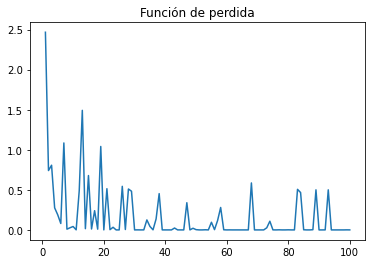

In [6]:
plt.plot(results["epoch"], results["total_loss"])
plt.title("Función de perdida")
plt.show()

In [7]:
# Convierto la salida de la NN a la categoria más elevada
output = [nn.forward(x) for x in x_test]
y_hat = np.zeros_like(y_test)
for i, o in enumerate(output):
    j = np.argmax(o)
    y_hat[i][j] = 1

# Veo los aciertos que se tiene
aciertos = 0
for yi, yi_hat in zip(y_test, y_hat):
    if (yi == yi_hat).all():
        aciertos += 1

print("precision:\t{:.2%}".format(aciertos / len(y_test)))    

precision:	89.99%


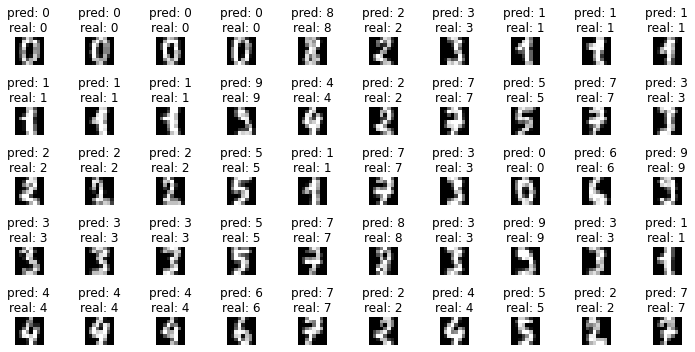

In [8]:
fig, ax = plt.subplots(5, 10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        x = digits.data[10* j + i]
        y = digits.target[10 * j + i]
        
        ax[i, j].imshow(x.reshape(8, 8), cmap="gray")
        y_hat = np.argmax(nn.forward(x / 16.0))
        
        ax[i, j].set_title("pred: {}\nreal: {}".format(y_hat, y))
        ax[i, j].axis("off")

plt.tight_layout()
plt.show()